In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# URL ke file CSV
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv"

# Baca dataset
df = pd.read_csv(url)

# Tampilkan beberapa baris pertama
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

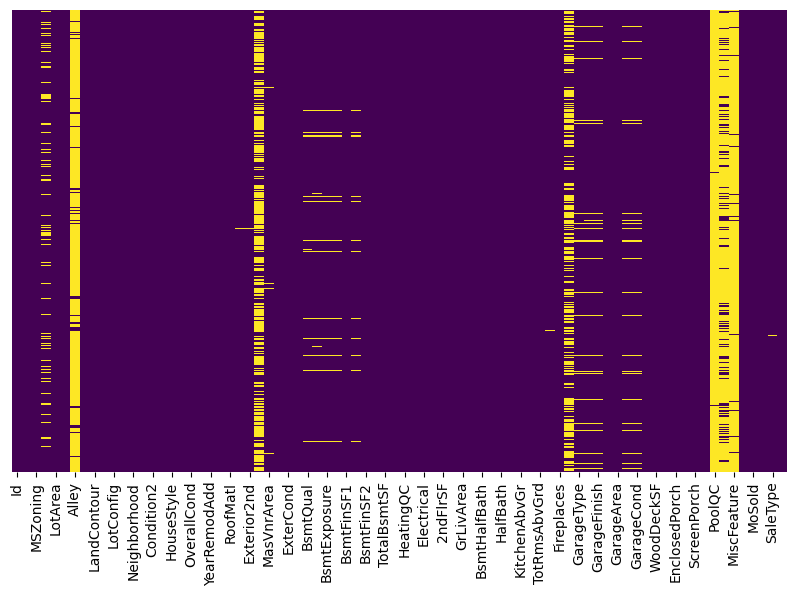

In [29]:
# Missing values heatmap

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [26]:
# Missing Values

missing_values = df.isnull().sum()
print("Missing values count per column:\n", missing_values)

Missing values count per column:
 Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [22]:
# Feature Engineering

# 1. Handling Missing Values (if any)
# Check for missing values
print(df.isnull().sum())

# Example: Fill missing values in 'LotFrontage' with the median
if 'LotFrontage' in df.columns and df['LotFrontage'].isnull().any():
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# 2. Create New Features
# Example 1: Total Area (combining 'LotArea' and other relevant features)
if 'LotArea' in df.columns and '1stFlrSF' in df.columns and '2ndFlrSF' in df.columns:
  df['TotalArea'] = df['LotArea'] + df['1stFlrSF'] + df['2ndFlrSF']


# Example 2: Total Bathrooms
if 'FullBath' in df.columns and 'HalfBath' in df.columns:
  df['TotalBathrooms'] = df['FullBath'] + (df['HalfBath'] * 0.5)


# Example 3: Age of the House (assuming 'YearBuilt' and 'YrSold' exist)
if 'YearBuilt' in df.columns and 'YrSold' in df.columns:
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']


# 3. Encoding Categorical Features (if any)
# Example: One-hot encoding for 'Neighborhood' feature
if 'Neighborhood' in df.columns:
    df = pd.get_dummies(df, columns=['Neighborhood'], prefix='Neighborhood')


# 4. Feature Scaling (if necessary)
# Example: Min-Max scaling for 'TotalArea'
from sklearn.preprocessing import MinMaxScaler
if 'TotalArea' in df.columns:
  scaler = MinMaxScaler()
  df[['TotalArea']] = scaler.fit_transform(df[['TotalArea']])

# 5. Feature Selection (if needed)
# Feature selection can be done after model training using methods like recursive feature elimination

# Display the updated DataFrame
df.head()


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,False,False,False,False,False,False,False,True,False,False


In [31]:
# Imputasi data numerikal

for col in df.columns:
    # Check if the column is of numeric type
    if pd.api.types.is_numeric_dtype(df[col]):
        # Impute missing values with the median of the column
        df[col] = df[col].fillna(df[col].median())

In [32]:
# Check for missing values after imputation
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


In [43]:
# Membuat Features baru
if 'LotArea' in df.columns and '1stFlrSF' in df.columns and '2ndFlrSF' in df.columns:
  df_test['TotalArea'] = df['LotArea'] + df['1stFlrSF'] + df['2ndFlrSF']

# Total Bathrooms
if 'FullBath' in df.columns and 'HalfBath' in df.columns:
  df_test['TotalBathrooms'] = df['FullBath'] + (df['HalfBath'] * 0.5)

# The House Age
if 'YearBuilt' in df.columns and 'YrSold' in df.columns:
    df_test['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [36]:
# Check Data

print(df.info())

print(df.isnull().sum())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1459 non-null   int64  
 1   MSSubClass      1459 non-null   int64  
 2   MSZoning        1455 non-null   object 
 3   LotFrontage     1459 non-null   float64
 4   LotArea         1459 non-null   int64  
 5   Street          1459 non-null   object 
 6   Alley           107 non-null    object 
 7   LotShape        1459 non-null   object 
 8   LandContour     1459 non-null   object 
 9   Utilities       1457 non-null   object 
 10  LotConfig       1459 non-null   object 
 11  LandSlope       1459 non-null   object 
 12  Neighborhood    1459 non-null   object 
 13  Condition1      1459 non-null   object 
 14  Condition2      1459 non-null   object 
 15  BldgType        1459 non-null   object 
 16  HouseStyle      1459 non-null   object 
 17  OverallQual     1459 non-null   i

In [46]:
target_column = 'LotFrontage'
X = df.drop(columns=[target_column])
y = df[target_column]

# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [51]:
def evaluate(y_true, y_pred, dataset=''):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nEvaluasi Model ({dataset} Set):")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")

evaluate(y_train, y_pred_train, "Training")
evaluate(y_test, y_pred_test, "Testing")


Evaluasi Model (Training Set):
MSE  : 126.97
RMSE : 11.27
R²   : 0.71

Evaluasi Model (Testing Set):
MSE  : 226.76
RMSE : 15.06
R²   : 0.36


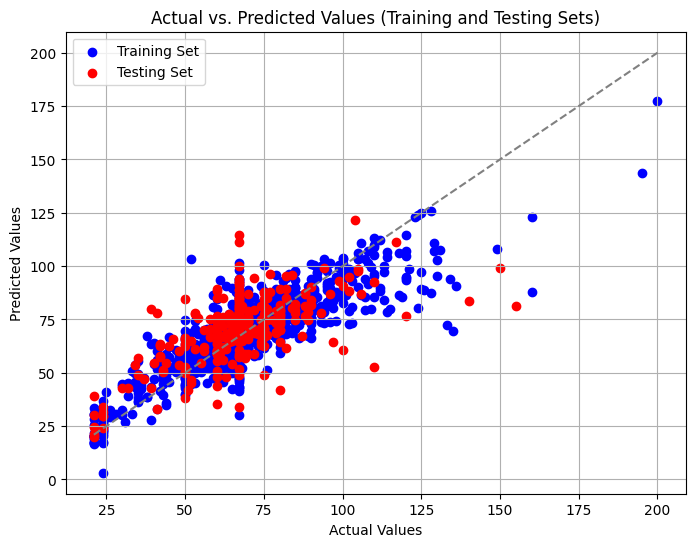

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Training Set')
plt.scatter(y_test, y_pred_test, color='red', label='Testing Set')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Training and Testing Sets)")
plt.legend()
plt.grid(True)
plt.show()

#**Penjelasan Matematika**

1. MSE
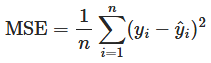

Rata-rata dari selisih kuadrat antara nilai prediksi dan aktual. Semakin kecil, semakin baik.
2. RMSE
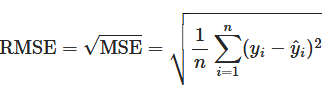

Akar dari MSE. Satuan sama seperti target aslinya. Juga makin kecil, makin baik.

3. Rsquared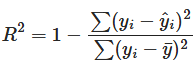

Skor akurasi model. Nilainya antara 0 sampai 1. Semakin mendekati 1, makin baik prediksi modelnya.